In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load file and format
master = pd.read_csv("../data/master/studytime.csv")
master["day of week"] = pd.Categorical(master["day of week"], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
master.head()

,term,week,day of week,class,time spent (min)
0,fa23,5,Monday,PHYS 214,0.0
1,fa23,5,Monday,MATH 241,60.0
2,fa23,5,Monday,LAS 101,0.0
3,fa23,5,Monday,STAT 107,0.0
4,fa23,5,Tuesday,LAS 101,0.0


In [3]:
fa23 = master[master["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
fa23_by_weekday = fa23.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"]]

sp24 = master[master["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
sp24_by_weekday = sp24.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[[ "STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"]]

fa24 = master[master["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
fa24_by_weekday = fa24.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[[ "IS 477", "CHEM 102", "CHEM 103", "GEOL 208", "ASTR 310", "ACES 179"]]

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/185353188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fa23_by_weekday = fa23.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"]]
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/185353188.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp24_by_weekday = sp24.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[[ "STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"]]
/var/folders/41/_gkgvhb94wd4156zplzr4cg0

In [4]:
fa23_by_weekday.sum(axis=1)

day of week
Sunday       140.852273
Monday       149.166667
Tuesday      154.513889
Wednesday    203.958333
Thursday     167.916667
Friday        76.250000
Saturday      88.472222
dtype: float64

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/3141317915.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[1, 0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"])


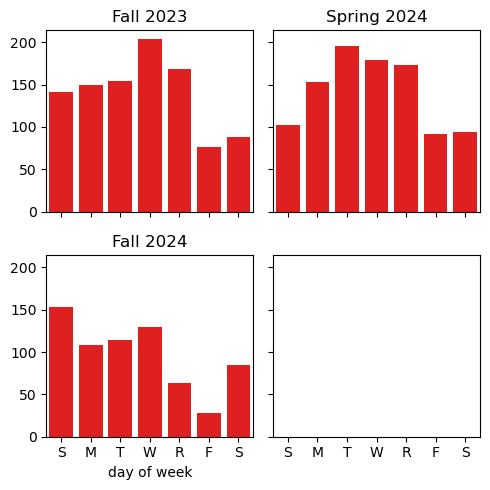

In [5]:
fig3, ax3 = plt.subplots(2,2, figsize=[5,5], sharey=True, sharex=True)
sns.barplot(fa23_by_weekday.sum(axis=1), errorbar=('ci', False), ax=ax3[0,0], color='red')
ax3[0,0].set_title("Fall 2023")
sns.barplot(sp24_by_weekday.sum(axis=1), errorbar=('ci', False), ax=ax3[0,1], color='red')
ax3[0,1].set_title("Spring 2024")
sns.barplot(fa24_by_weekday.sum(axis=1), errorbar=('ci', False), ax=ax3[1,0], color='red')
ax3[1,0].set_title("Fall 2024")
ax3[1, 0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"])
plt.tight_layout()
fig3.savefig("../results/day_of_week_barplot.png")

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/2791869126.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = master[master['term'] == 'fa23'].set_index(['term', 'week']).groupby(['day of week', 'class']).agg('mean').reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/2791869126.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_6795/2791869126.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True t

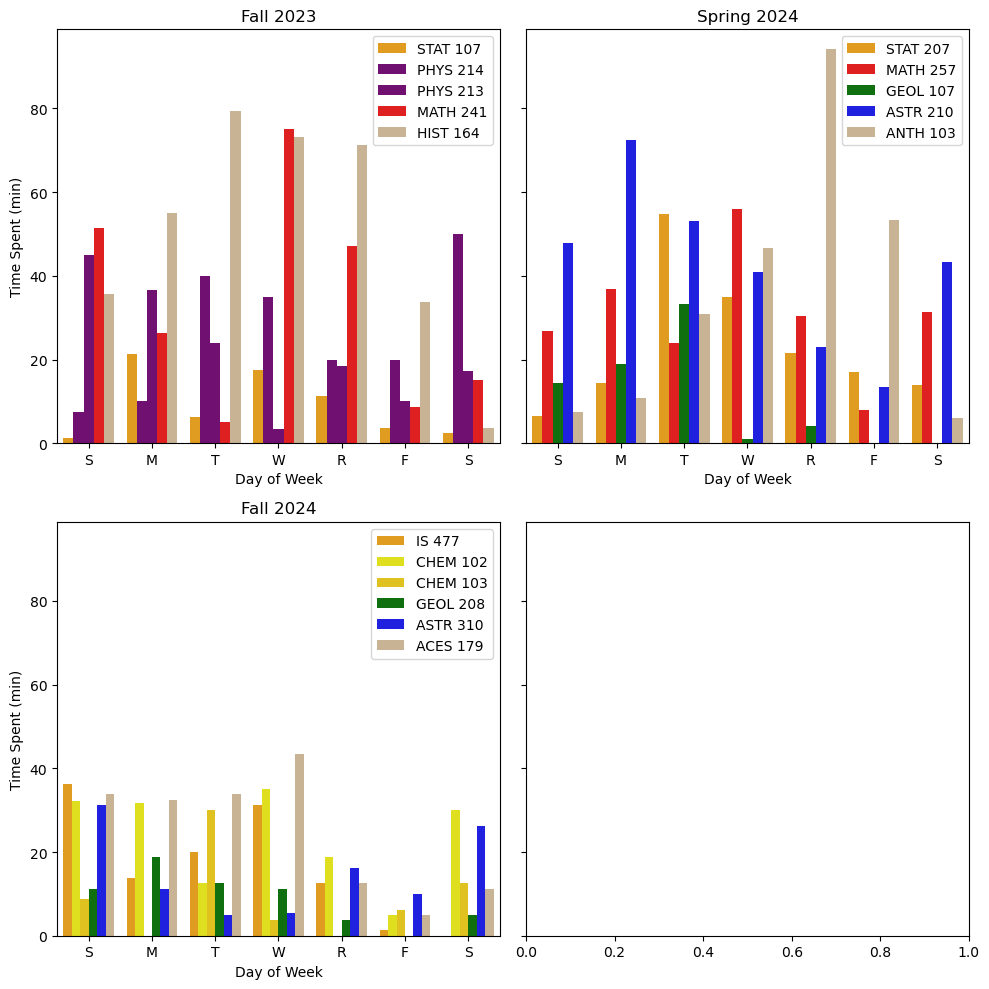

In [6]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True)

# Fa23
bar_data = master[master['term'] == 'fa23'].set_index(['term', 'week']).groupby(['day of week', 'class']).agg('mean').reset_index()
sns.barplot(bar_data, x='day of week', y='time spent (min)', hue='class', errorbar=('ci', False), hue_order=["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"], palette=['orange', 'purple', 'purple', 'red', 'tan'], ax=ax[0,0])
ax[0,0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles, labels)
ax[0,0].set_title("Fall 2023")
ax[0,0].set_ylabel("Time Spent (min)")
ax[0,0].set_xlabel("Day of Week")

# Sp24
bar_data = master[master['term'] == 'sp24'].set_index(['term', 'week']).groupby(['day of week', 'class']).agg('mean').reset_index()
sns.barplot(bar_data, x='day of week', y='time spent (min)', hue='class', errorbar=('ci', False), hue_order=["STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"], palette=['orange', 'red', 'green', 'blue', 'tan'], ax=ax[0,1])
ax[0,1].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
handles, labels = ax[0,1].get_legend_handles_labels()
ax[0,1].legend(handles, labels)
ax[0,1].set_title("Spring 2024")
ax[0,1].set_xlabel("Day of Week")

# Fa24
bar_data = master[master['term'] == 'fa24'].set_index(['term', 'week']).groupby(['day of week', 'class']).agg('mean').reset_index()
sns.barplot(bar_data, x='day of week', y='time spent (min)', hue='class', errorbar=('ci', False), hue_order=["IS 477", "CHEM 102", "CHEM 103", "GEOL 208", "ASTR 310", "ACES 179"], palette=['orange', 'yellow', 'gold', 'green', 'blue', 'tan'], ax=ax[1,0])
ax[1,0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
handles, labels = ax[1,0].get_legend_handles_labels()
ax[1,0].legend(handles, labels)
ax[1,0].set_title("Fall 2024")
ax[1,0].set_ylabel("Time Spent (min)")
ax[1,0].set_xlabel("Day of Week")

plt.tight_layout()
fig.savefig("../results/day_of_week_by_class_barplot.png")


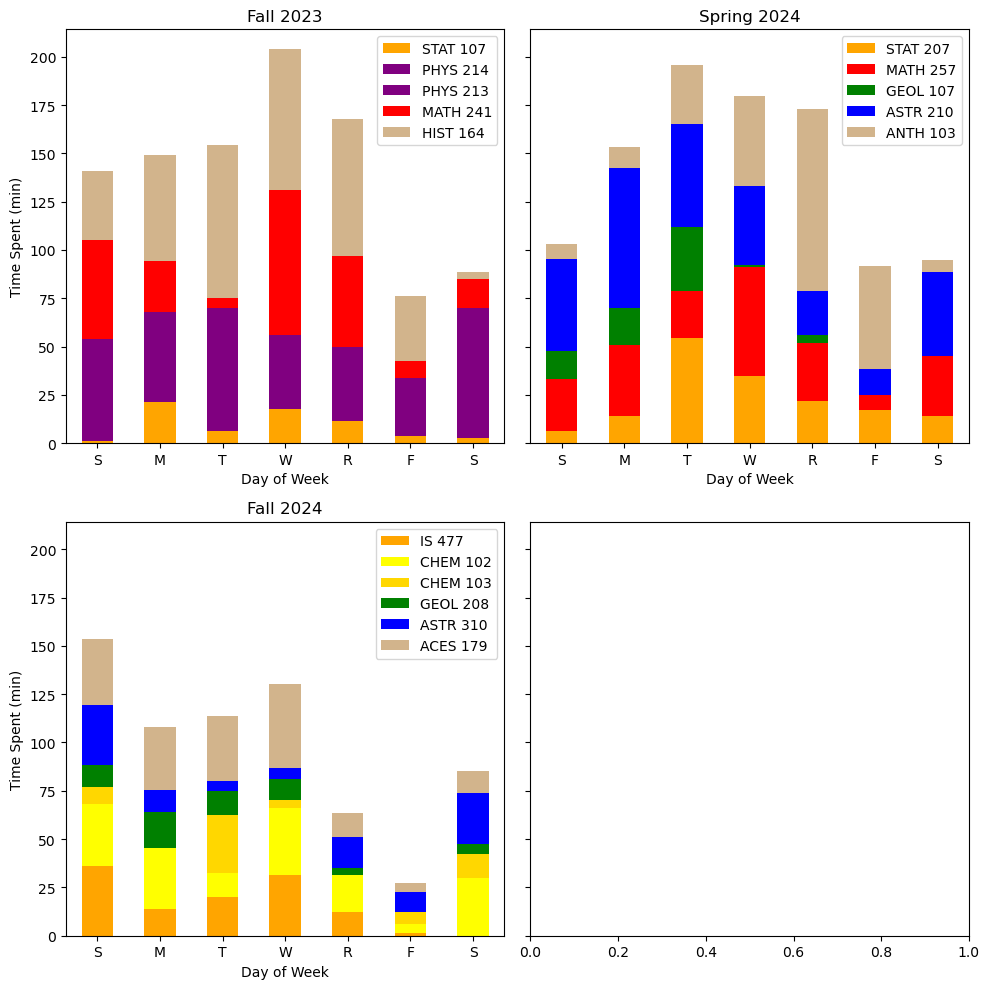

In [7]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True)

# Fa23
fa23_by_weekday.plot(kind='bar', stacked=True, color=['orange', 'purple', 'purple', 'red', 'tan'], ax=ax[0,0])
ax[0,0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
ax[0,0].legend(fa23_by_weekday.columns, loc='upper right')
ax[0,0].set_title("Fall 2023")
ax[0,0].set_ylabel("Time Spent (min)")
ax[0,0].set_xlabel("Day of Week")

# Sp24
sp24_by_weekday.plot(kind='bar', stacked=True, color=['orange', 'red', 'green', 'blue', 'tan'], ax=ax[0,1])
ax[0,1].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
ax[0,1].legend(sp24_by_weekday.columns, loc='upper right')
ax[0,1].set_title("Spring 2024")
ax[0,1].set_xlabel("Day of Week")

# Sp24
fa24_by_weekday.plot(kind='bar', stacked=True, color=['orange', 'yellow', 'gold', 'green', 'blue', 'tan'], ax=ax[1,0])
ax[1,0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"], rotation=0)
ax[1,0].legend(fa24_by_weekday.columns, loc='upper right')
ax[1,0].set_title("Fall 2024")
ax[1,0].set_ylabel("Time Spent (min)")
ax[1,0].set_xlabel("Day of Week")
plt.tight_layout()

fig.savefig("../results/day_of_week_by_class_stacked_barplot.png")